# Load packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# import os
# os.getcwd()

Mounted at /content/drive


In [2]:
!pip install scanpy
!pip install anndata
!pip install scvi-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.4/535.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.8 MB/s eta 0:00:00
   

In [3]:
!pip install git+https://github.com/YosefLab/mrvi.git@main

  Cloning https://github.com/YosefLab/mrvi.git (to revision main) to /tmp/pip-req-build-v_lrl5zt
  Running command git clone --filter=blob:none --quiet https://github.com/YosefLab/mrvi.git /tmp/pip-req-build-v_lrl5zt
  Resolved https://github.com/YosefLab/mrvi.git to commit 2a8293a86f462a17e731af8b8d36c3e4f592de36
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mrvi: filename=mrvi-1.0.1-py3-none-any.whl size=27083 sha256=13852ff8228bcdfffd185cf1bc3f976913b5b1c00508572e622f9729d720742d
  Stored in directory: /tmp/pip-ephem-wheel-cache-90firw20/wheels/df/e8/dc/59ee7fd8be87b9031b2363b409cdf556948992f170fc937d0e
Successfully built mrvi


In [4]:
import numpy as np
import pandas as pd
import os, errno
import datetime
import uuid
import itertools
import yaml
import subprocess
import scipy.sparse as sp
from scipy.spatial.distance import squareform
from sklearn.decomposition import non_negative_factorization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils import sparsefuncs
from scipy.cluster.hierarchy import leaves_list
import matplotlib.pyplot as plt
from multiprocessing import Pool
import scanpy as sc
%matplotlib inline
from scipy.io import mmread
from IPython.display import Image
import anndata
import seaborn as sns
from mrvi import MrVI

<ipython-input-4-6f7d279841c6>:25: FutureWarning: This package is deprecated. For the latest version of MrVI, please install `scvi-tools` and import the model class via `scvi.external.MRVI`.
  from mrvi import MrVI


# Upload Data

In [5]:
adata = sc.read_mtx(
    '/content/drive/My Drive/SHP2_project/old_dataset/SHP2_UMI_count_filt_transpose.mtx'
)

# adata = adata.T

In [6]:
genelist = pd.read_csv("/content/drive/My Drive/SHP2_project/old_dataset/SHP2_rowData.csv",
                       sep=',',
                       header = 0)
genelist

adata.var_names = genelist["id"]

In [7]:
colData = pd.read_csv('/content/drive/My Drive/SHP2_project/old_dataset/SHP2_colData.csv')
colData

,P7,P5,sample,Size_Factor,n_umi,cell_ID,RT,Lig,RT_well_position,timepoint,...,Cell,log10_umi,percent_mito,doublet_score,num_genes_expressed,g1s_score,g2m_score,proliferation_index,Cluster,Partition
0,01E,A05,sciPlex,2.443356,2359,01E_A05_RT_BC_100_Lig_BC_16,RT_BC_100,Lig_BC_16,A04,24hr,...,01E_A05_RT_BC_100_Lig_BC_16,3.372728,0.0,0.007434,1670,1.906549,2.217622,2.702386,4,1
1,01E,A05,sciPlex,2.952950,2851,01E_A05_RT_BC_100_Lig_BC_54,RT_BC_100,Lig_BC_54,A04,24hr,...,01E_A05_RT_BC_100_Lig_BC_54,3.454997,0.0,0.008096,2118,2.006097,2.766341,3.106137,3,1
2,01E,A05,sciPlex,1.723504,1664,01E_A05_RT_BC_100_Lig_BC_77,RT_BC_100,Lig_BC_77,A04,24hr,...,01E_A05_RT_BC_100_Lig_BC_77,3.221153,0.0,0.006122,1325,2.663395,2.272456,3.137584,4,1
3,01E,A05,sciPlex,0.425697,411,01E_A05_RT_BC_101_Lig_BC_1,RT_BC_101,Lig_BC_1,A05,24hr,...,01E_A05_RT_BC_101_Lig_BC_1,2.613842,0.0,0.010102,372,1.740146,2.545174,2.858974,3,1
4,01E,A05,sciPlex,1.470778,1420,01E_A05_RT_BC_101_Lig_BC_30,RT_BC_101,Lig_BC_30,A05,24hr,...,01E_A05_RT_BC_101_Lig_BC_30,3.152288,0.0,0.019236,1171,1.313629,2.680901,2.851740,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29711,12E,H05,sciPlex,2.829695,2732,12E_H05_RT_BC_97_Lig_BC_47,RT_BC_97,Lig_BC_47,A01,24hr,...,12E_H05_RT_BC_97_Lig_BC_47,3.436481,0.0,0.006836,1889,1.586649,2.087893,2.481170,3,1
29712,12E,H05,sciPlex,1.921334,1855,12E_H05_RT_BC_97_Lig_BC_5,RT_BC_97,Lig_BC_5,A01,24hr,...,12E_H05_RT_BC_97_Lig_BC_5,3.268344,0.0,0.015835,1427,2.387750,1.980403,2.841101,1,1
29713,12E,H05,sciPlex,1.092726,1055,12E_H05_RT_BC_97_Lig_BC_50,RT_BC_97,Lig_BC_50,A01,24hr,...,12E_H05_RT_BC_97_Lig_BC_50,3.023252,0.0,0.000844,933,0.649792,2.118799,2.223139,2,1
29714,12E,H05,sciPlex,0.528237,510,12E_H05_RT_BC_98_Lig_BC_29,RT_BC_98,Lig_BC_29,A02,24hr,...,12E_H05_RT_BC_98_Lig_BC_29,2.707570,0.0,0.009369,466,1.899008,1.565732,2.348079,1,1


In [ ]:
colData.columns.unique()

Index(['P7', 'P5', 'sample', 'Size_Factor', 'n_umi', 'cell_ID', 'RT', 'Lig',
       'RT_well_position', 'timepoint', 'SHP2_mut', 'EGF_dose', 'hash_plate',
       'hash_well', 'hash_umis', 'proportion', 'total_hash_umis_per_cell',
       'rank', 'top_to_second_best_ratio', 'log10_dose', 'Cell', 'log10_umi',
       'percent_mito', 'doublet_score', 'num_genes_expressed', 'g1s_score',
       'g2m_score', 'proliferation_index', 'Cluster', 'Partition'],
      dtype='object')

In [8]:

# Timepoint annotations
timepoint = colData['timepoint']
adata.obs['timepoint'] = timepoint.values.astype('str')

# Mutant annotations
SHP2_mut = colData['SHP2_mut']
adata.obs['SHP2_mut'] = SHP2_mut.values.astype('str')

# EGF Dose annotations
EGF_dose = colData['EGF_dose']
adata.obs['EGF_dose'] = EGF_dose.values.astype('str')

# Replicate
replicate = colData['hash_plate']
adata.obs['replicate'] = replicate.values.astype('str')

# Display anndata summary
adata

AnnData object with n_obs × n_vars = 29716 × 10659
    obs: 'timepoint', 'SHP2_mut', 'EGF_dose', 'replicate'

In [9]:
adata.obs['time_mut_dose'] = adata.obs['timepoint']+'_'+adata.obs['SHP2_mut']+'_'+adata.obs['EGF_dose']
adata.obs['time_mut_dose']

,time_mut_dose
0,24hr_E139D_0.0
1,24hr_T468M_0.0
2,24hr_T52S_500.0
3,24hr_T507K_1000.0
4,24hr_Q510E_250.0
...,...
29711,24hr_T52S_25.0
29712,24hr_Q510K_250.0
29713,24hr_KO_0.0
29714,24hr_T42A_500.0


In [10]:
adata.obs['time_mut_dose'].value_counts()

,count
time_mut_dose,
96hr_Q510E_500.0,413
96hr_T42A_1000.0,406
96hr_T42A_250.0,399
96hr_KO_500.0,397
96hr_T42A_25.0,353
...,...
96hr_Y279C_100.0,54
96hr_WT_50.0,54
96hr_E76K_25.0,51


# Feature selection

In [11]:
hvg_union = set()
for c in np.unique(adata.obs['timepoint']):
    for d in np.unique(adata.obs['SHP2_mut']):
        adata_temp = adata[(adata.obs['timepoint'] == c) & (adata.obs['SHP2_mut'] == d)]
        sc.pp.log1p(adata_temp)
        sc.pp.highly_variable_genes(adata_temp,
                                    flavor='seurat',
                                    n_top_genes=300,
                                    inplace=True,
                                    subset=True)
        hvg_union = hvg_union.union(set(adata_temp.var_names))
print(len(hvg_union))

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.11/dist-packages/

3318


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:413: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
adata = adata[:,list(hvg_union)]
adata

View of AnnData object with n_obs × n_vars = 29716 × 3318
    obs: 'timepoint', 'SHP2_mut', 'EGF_dose', 'replicate', 'time_mut_dose'

In [13]:
hvg_list = list(hvg_union)
df = pd.DataFrame(hvg_list, columns=['genes'])
df.to_csv('/content/drive/My Drive/SHP2_project/old_dataset/hvg_union.csv', index=False)

# Subset for cell line

In [ ]:
# Split the dataset: single cell line and random sets of cells from each drug-dose facet

adata_mini = adata[adata.obs['timepoint'] == '24hr']
adata_mini

View of AnnData object with n_obs × n_vars = 13446 × 3318
    obs: 'timepoint', 'SHP2_mut', 'EGF_dose', 'replicate', 'time_mut_dose'

# Fit the model

In [ ]:
batch_key = 'replicate'
sample_key = 'time_mut_dose'
labels_key = None

MrVI.setup_anndata(adata_mini,
                   sample_key=sample_key,
                   batch_key=batch_key)

/usr/local/lib/python3.10/dist-packages/mrvi/_model.py:174: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["_indices"] = np.arange(adata.n_obs).astype(int)


In [ ]:


model = MrVI.load(
    dir_path='/content/drive/My Drive/SHP2_project/old_dataset/SHP2_MrVI_allcells_model_time-mut-dose_attention/',
    adata=
    accelerator='gpu'
)
model


INFO     File /content/drive/My                                                                                    
         Drive/SHP2_project/old_dataset/SHP2_MrVI_allcells_model_time-mut-dose_attention/model.pt already          
         downloaded                                                                                                


ValueError: Save path contains no saved anndata and no adata was passed.

In [ ]:
model = MrVI(adata_mini)
model.train(accelerator='gpu')

INFO     Jax module moved to cuda:0.Note: Pytorch lightning will show GPU is not being used for the Trainer.       


INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Epoch 400/400: 100%|██████████| 400/400 [10:21<00:00,  1.39s/it, v_num=1, train_loss_step=1.18e+3, train_loss_epoch=1.16e+3]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [10:21<00:00,  1.55s/it, v_num=1, train_loss_step=1.18e+3, train_loss_epoch=1.16e+3]


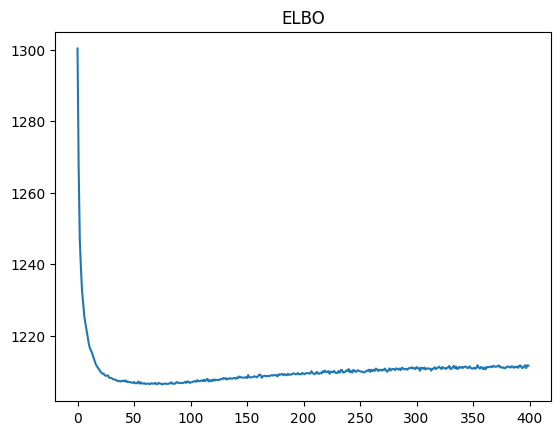

In [ ]:
plt.plot(model.history["elbo_validation"])
plt.title("ELBO")
plt.show()

In [ ]:
model.history

{'train_loss_step':       train_loss_step
 epoch                
 0         1190.715332
 1         1124.199097
 2         1157.817749
 3         1193.059814
 4         1198.277588
 ...               ...
 395       1131.896484
 396       1167.963135
 397       1080.028809
 398       1265.274536
 399       1258.370483
 
 [400 rows x 1 columns],
 'validation_loss':       validation_loss
 epoch                
 0         1220.607666
 1         1205.645264
 2         1198.543823
 3         1196.425171
 4         1194.719238
 ...               ...
 395       1204.203125
 396       1204.179077
 397       1203.879395
 398       1204.257202
 399       1204.187744
 
 [400 rows x 1 columns],
 'elbo_validation':       elbo_validation
 epoch                
 0         1290.863159
 1         1256.215576
 2         1238.487061
 3         1228.940552
 4         1222.575684
 ...               ...
 395       1204.203247
 396       1204.179199
 397       1203.879395
 398       1204.257202
 399       1204

In [ ]:

model.save(dir_path='/content/drive/My Drive/SHP2_project/24hr/SHP2_MrVI_allcells_model_time-mut-dose_attention',
           overwrite=True,
           save_anndata=False)


# Get latent representations

In [ ]:
pip install pymde

100%|██████████| 106/106 [00:01<00:00, 53.59it/s]

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


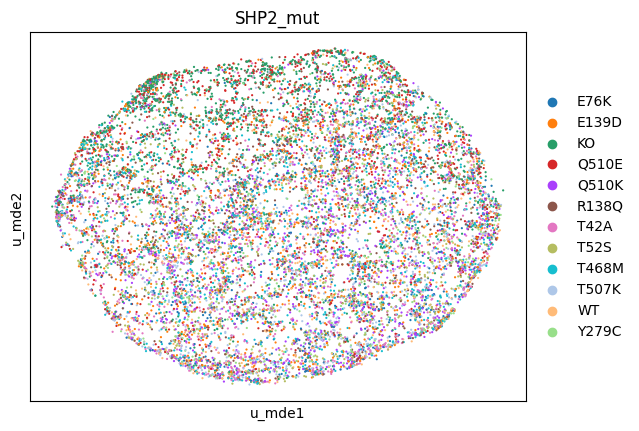

In [ ]:
from scvi.model.utils import mde

u = model.get_latent_representation(give_z=False)
u_mde = mde(u)
adata_mini.obsm["u_mde"] = u_mde
sc.pl.embedding(adata_mini, basis="u_mde", color="SHP2_mut", size=10)

In [ ]:
# sc.pl.embedding(adata, basis="u_mde", color="SHP2_mut", size=10)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


KeyError: "Could not find 'u_mde' or 'X_u_mde' in .obsm"

In [ ]:
# save sample-sample dist matrix
# np.savetxt("/content/drive/My Drive/SHP2_project/24hr/SHP2_24hr_MrVI_u_factor.csv", u, delimiter=",")

100%|██████████| 106/106 [00:01<00:00, 53.18it/s]

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


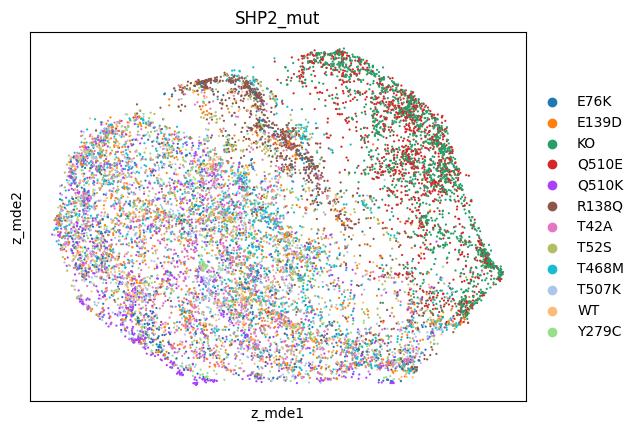

In [ ]:
z = model.get_latent_representation(give_z=True)
z_mde = mde(z)
adata_mini.obsm["z_mde"] = z_mde
sc.pl.embedding(adata_mini, basis="z_mde", color="SHP2_mut", size=10)

In [ ]:
# save sample-sample dist matrix
np.savetxt("/content/drive/My Drive/SHP2_project/old_dataset/SHP2_24hr_MrVI_z_factor.csv", z, delimiter=",")

# Cell distances

In [ ]:
# Compute local sample representations
cell_reps = model.get_local_sample_representation(adata_mini)

100%|██████████| 53/53 [00:41<00:00,  1.29it/s]


In [ ]:
import xarray as xr

batch_key = 'replicate'
sample_key = 'time_mut_dose'
labels_key = None

cell_dists = model.get_local_sample_distances(
        adata_mini,
        use_mean=True,
        normalize_distances=True,
        keep_cell=False,
        groupby=sample_key,
    )

# save dists
cell_dists.to_netcdf("/content/drive/My Drive/SHP2_project/SHP2_24hr_cell_dists_namedosesample_attention.nc")

<ipython-input-24-be819dc5a68d>:7: UserWarning: Normalizing distances uses sampled distances. Ignoring ``use_mean``.
  cell_dists = model.get_local_sample_distances(
100%|██████████| 53/53 [04:32<00:00,  5.14s/it]


In [ ]:
'''
import xarray as xr

# load dists
cell_dists = xr.open_dataset("/content/drive/My Drive/PhD/Research/RG Factor Analysis/MrVI/bt112_cell_dists_namedosesample_attention_morecells.nc")
cell_dists
'''

In [ ]:
# create a DataFrame for mean sample-sample distances across all cells

drug_dist_df = pd.DataFrame(
        cell_dists['time_mut_dose'].mean(axis=0),
        columns = cell_dists['sample_x'].values,
        index = cell_dists['sample_x'].values
)
drug_dist_df
drug_dist_df.to_csv('/content/drive/My Drive/SHP2_project/24hr/SHP2_24hr_mrvi_dist_df_attention.csv')

In [ ]:
# save sample-sample dist matrix
# drug_dist_df.to_csv('/content/drive/My Drive/SHP2_project/SHP2_allcells_mrvi_dist_df_attention.csv')

# Sample-sample dist matrix

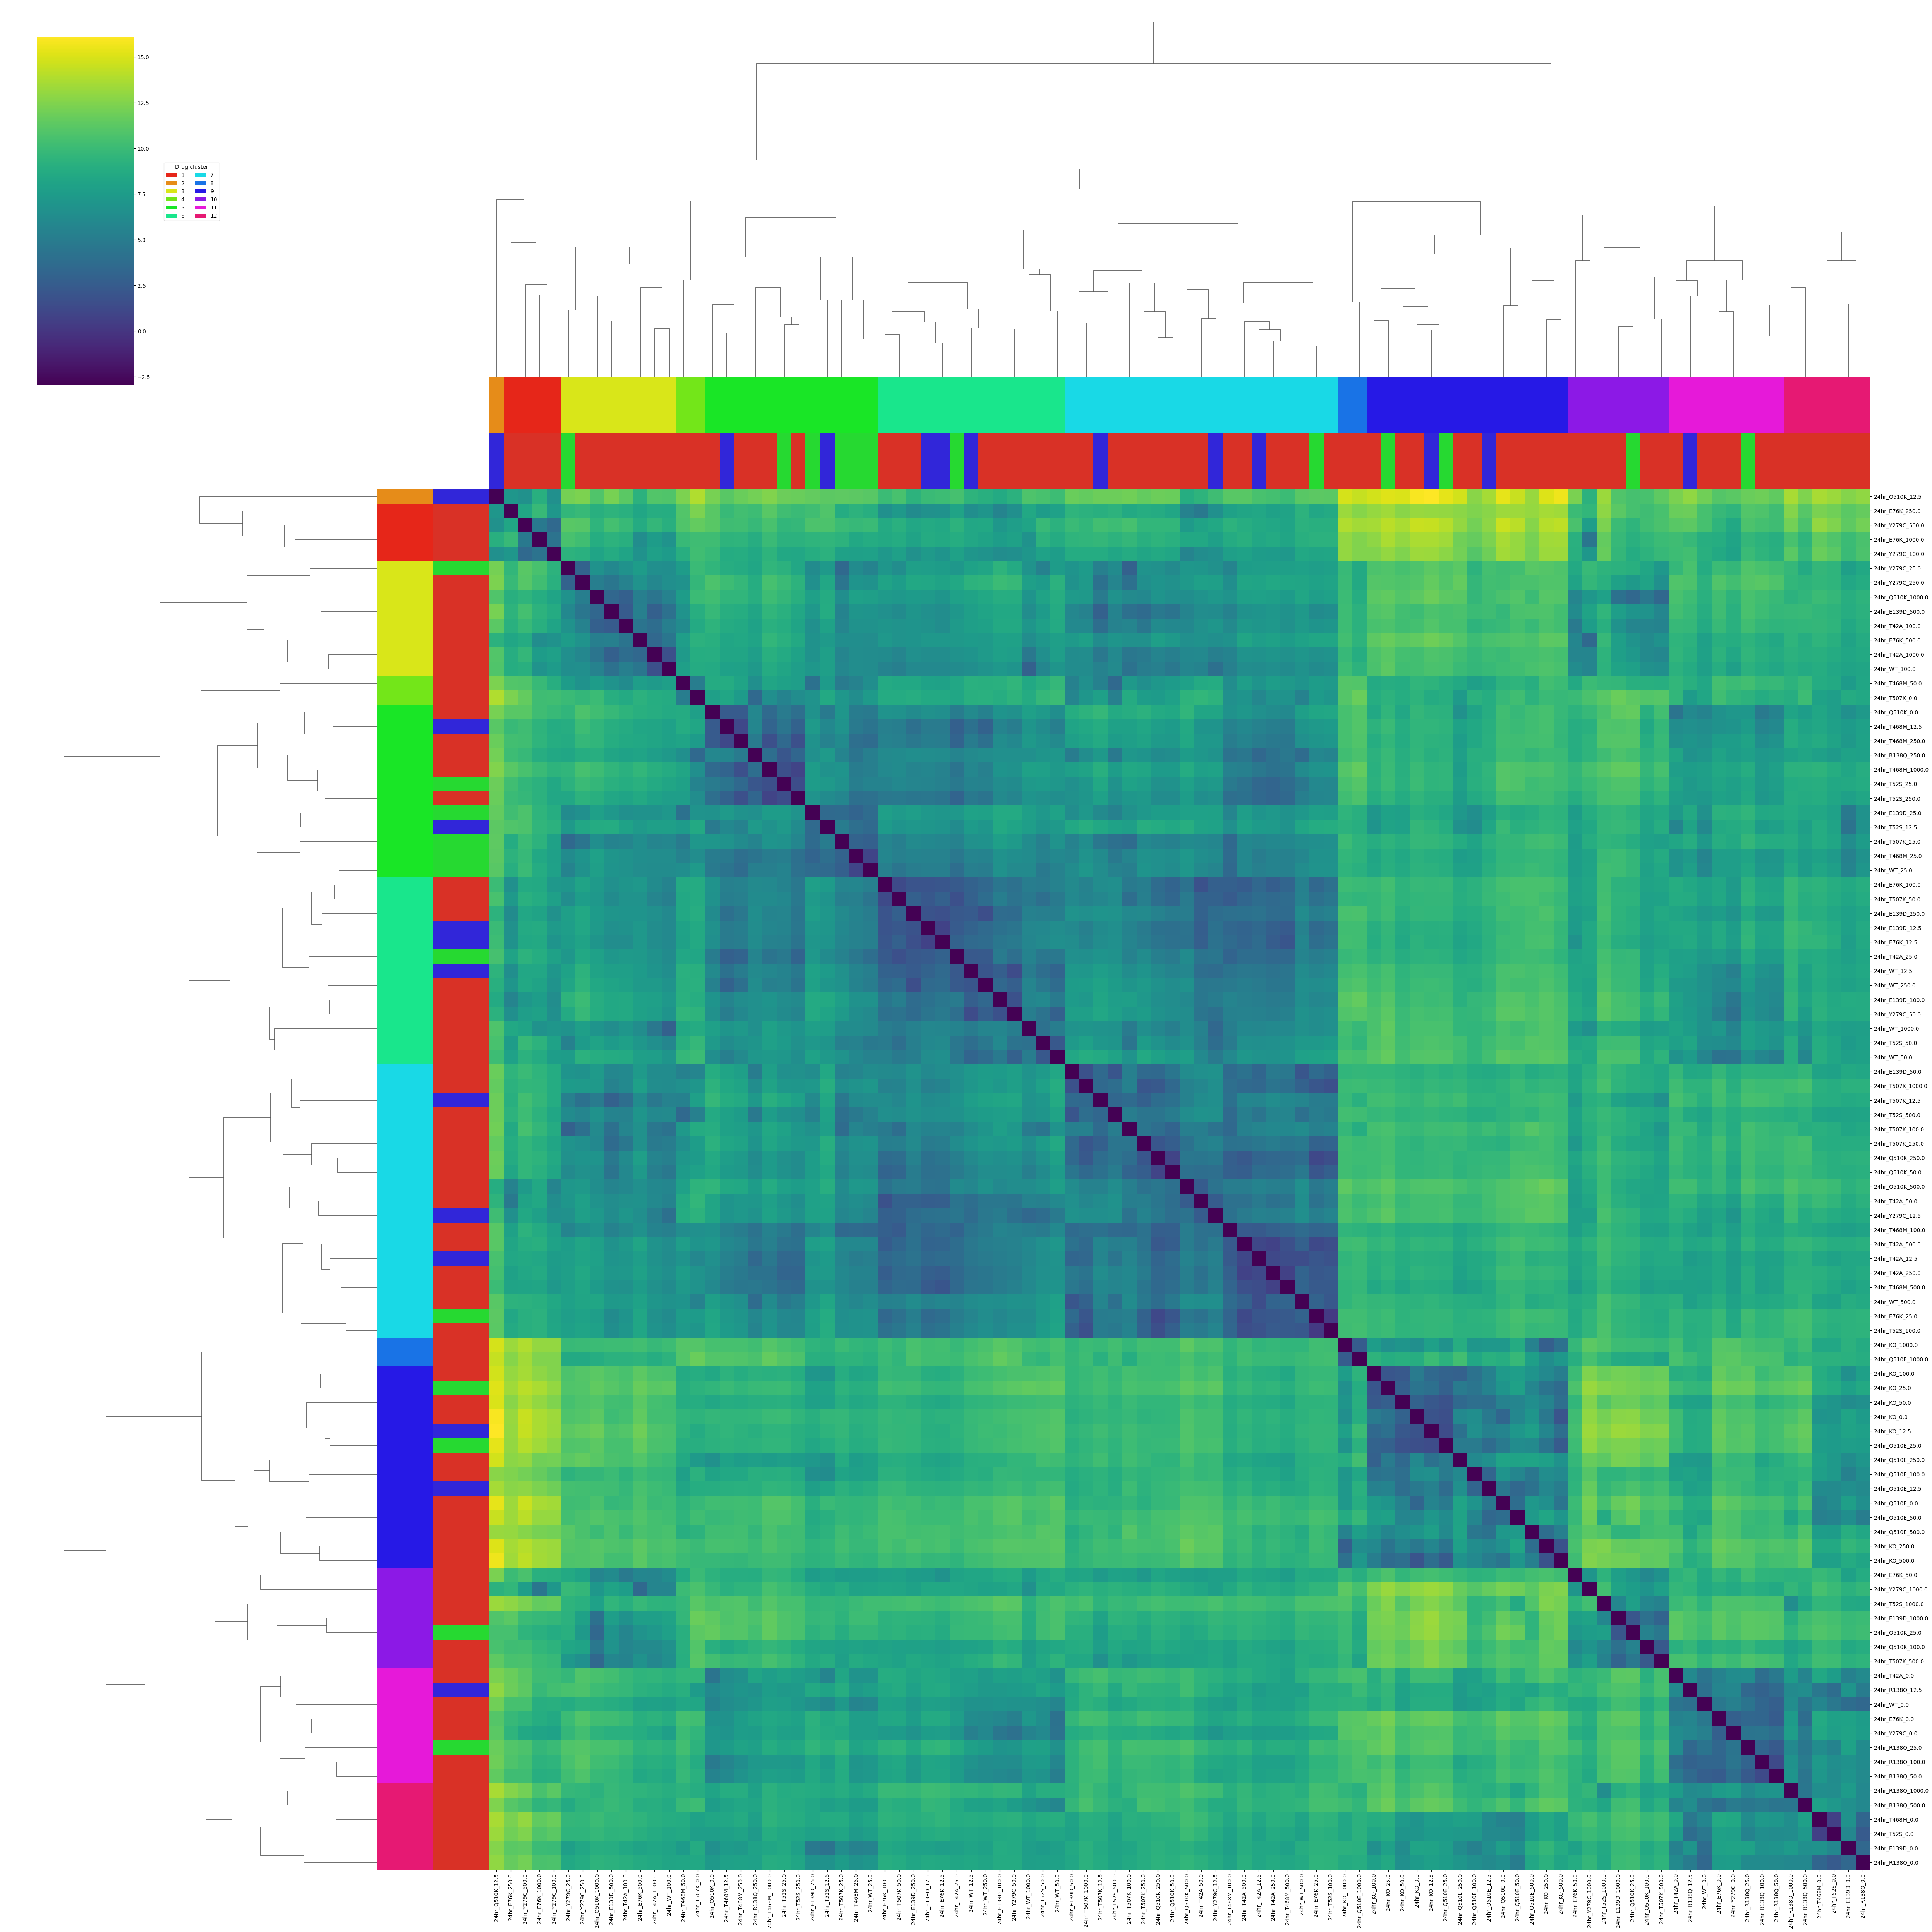

In [ ]:
# HEATMAP: Sample-Sample dist matrix

from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

cluster_method = 'complete'

row_linkage = hierarchy.linkage(
    distance.pdist(drug_dist_df),
    method=cluster_method
)

col_linkage = row_linkage

row_col_labels = fcluster(col_linkage, t=28, criterion='distance')
# row_col_labels = np.array([i[0] for i in drug_cluster_labels.values.tolist()])
lut = dict(zip(set(row_col_labels), sns.hls_palette(len(set(row_col_labels)), l=0.5, s=0.8)))
row_col = pd.DataFrame(row_col_labels)[0].map(lut)

labels2 = np.array([i[-3:] for i in drug_dist_df.columns.values])
lut2 = dict(zip(set(labels2), sns.hls_palette(len(set(labels2)), l=0.5, s=0.7)))
row_col2 = pd.DataFrame(labels2)[0].map(lut2)

g = sns.clustermap(drug_dist_df,
                   row_linkage=row_linkage,
                   col_linkage=col_linkage,
                   method=cluster_method,
                   row_colors = [row_col, row_col2],
                   col_colors = [row_col, row_col2],
                   annot=False,
                   figsize=(50, 50),
                   cmap='viridis',
                   yticklabels=True,xticklabels=True)
                   # vmin=0,vmax=2)

from matplotlib.pyplot import gcf

for label in np.unique(row_col_labels):
    g.ax_col_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
l1 = g.ax_col_dendrogram.legend(title='Drug cluster', loc="center",
                               bbox_to_anchor=(0.1, 0.9), bbox_transform=gcf().transFigure,
                               ncol=2)

# for label in np.unique(labels2):
#     g.ax_row_dendrogram.bar(0, 0, color=lut2[label], label=label, linewidth=0)
# l2 = g.ax_row_dendrogram.legend(title='Dose', loc="center",
#                              bbox_to_anchor=(0.12, 0.9), bbox_transform=gcf().transFigure)

plt.show()

In [ ]:
# Cell-level drug cluster assignment

drug_cluster = pd.DataFrame(row_col_labels,
                            index = drug_dist_df.index,
                            columns = ['cluster'])

donor_cluster = np.zeros((adata_mini.obsm['z_mde'].shape[0],1))

for i in range(adata_mini.obsm['z_mde'].shape[0]):
    donor_cluster[i] = drug_cluster.loc[adata_mini[i].obs['time_mut_dose'][0]][0]

donor_cluster = donor_cluster[:,0].tolist()
np.unique(donor_cluster)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


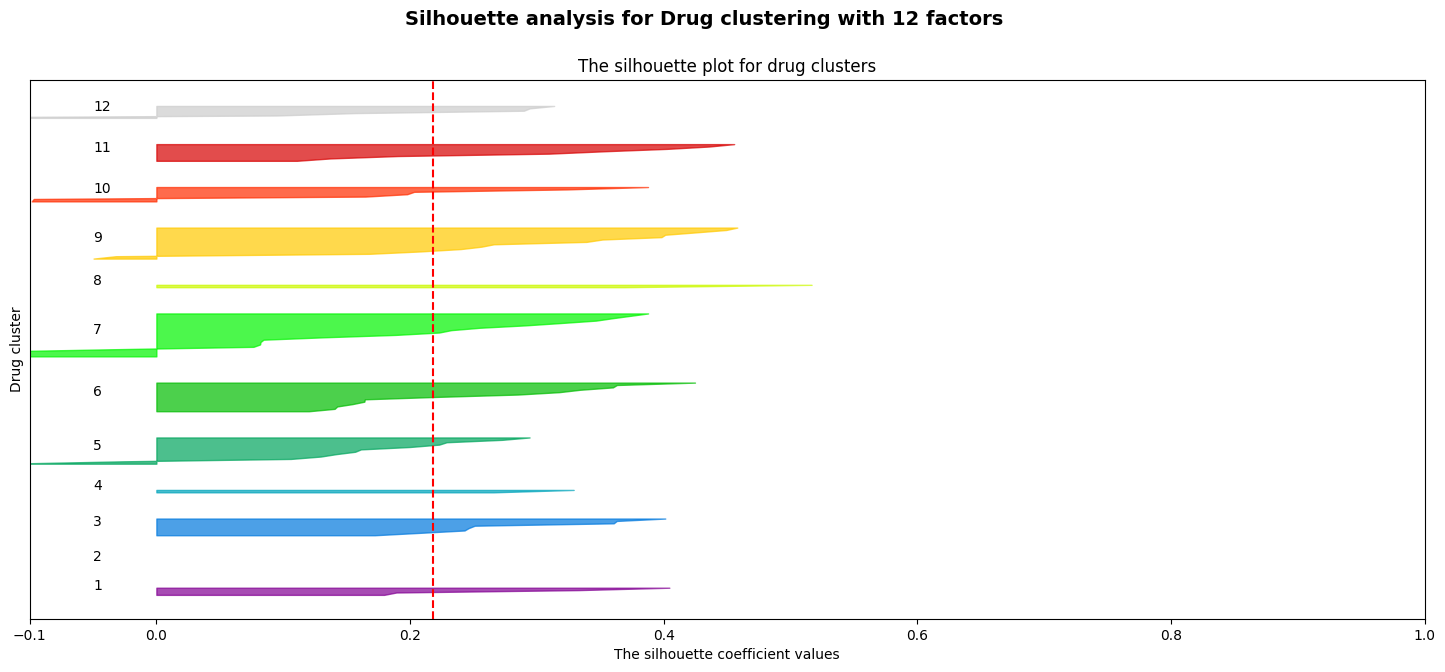

In [ ]:
# Silhouette scores for drug cluster assignment

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

n_clusters = len(np.unique(drug_cluster))
stability = silhouette_score(drug_dist_df.values, drug_cluster, metric='euclidean')

# Silhouette plot

fig_sil, ax1 = plt.subplots(1, 1)
fig_sil.set_size_inches(18, 7)
ax1.set_xlim([-.1, 1])
ax1.set_ylim([0, len(drug_dist_df.values) + (n_clusters + 1) * 10])

sample_silhouette_values = silhouette_samples(drug_dist_df.values, drug_cluster)
y_lower = 10
for i in range(1,n_clusters+1):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[np.where(drug_cluster == i)[0]]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for drug clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Drug cluster")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=stability, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

plt.suptitle(
    "Silhouette analysis for Drug clustering with %d factors"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)
plt.show()

In [ ]:
# Save DRC labels
drug_cluster.to_csv('/content/drive/My Drive/SHP2_project/24hr/SHP2_24hr_normalized_attention_dist_cluster_labels.csv')

# Heatmap: Drug x Drug Response

In [ ]:
drug_class_drugdose_df = pd.DataFrame(0,
                                      index=np.unique(adata_mini.obs['drug_name']).tolist(),
                                      columns=np.arange(1,n_clusters+1))

drug_cluster_labels=drug_cluster

for i in range(len(drug_cluster_labels)):
    drugname = drug_cluster_labels.index[i][:-4]
    drug_class_drugdose_df.loc[drugname,drug_cluster_labels.iloc[i][0]] = 1

drug_class_drugdose_df

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
AC480,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AEE788,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-1478,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-1557,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-18,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Varlitinib,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WHI-P154,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WZ3146,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
WZ4002,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


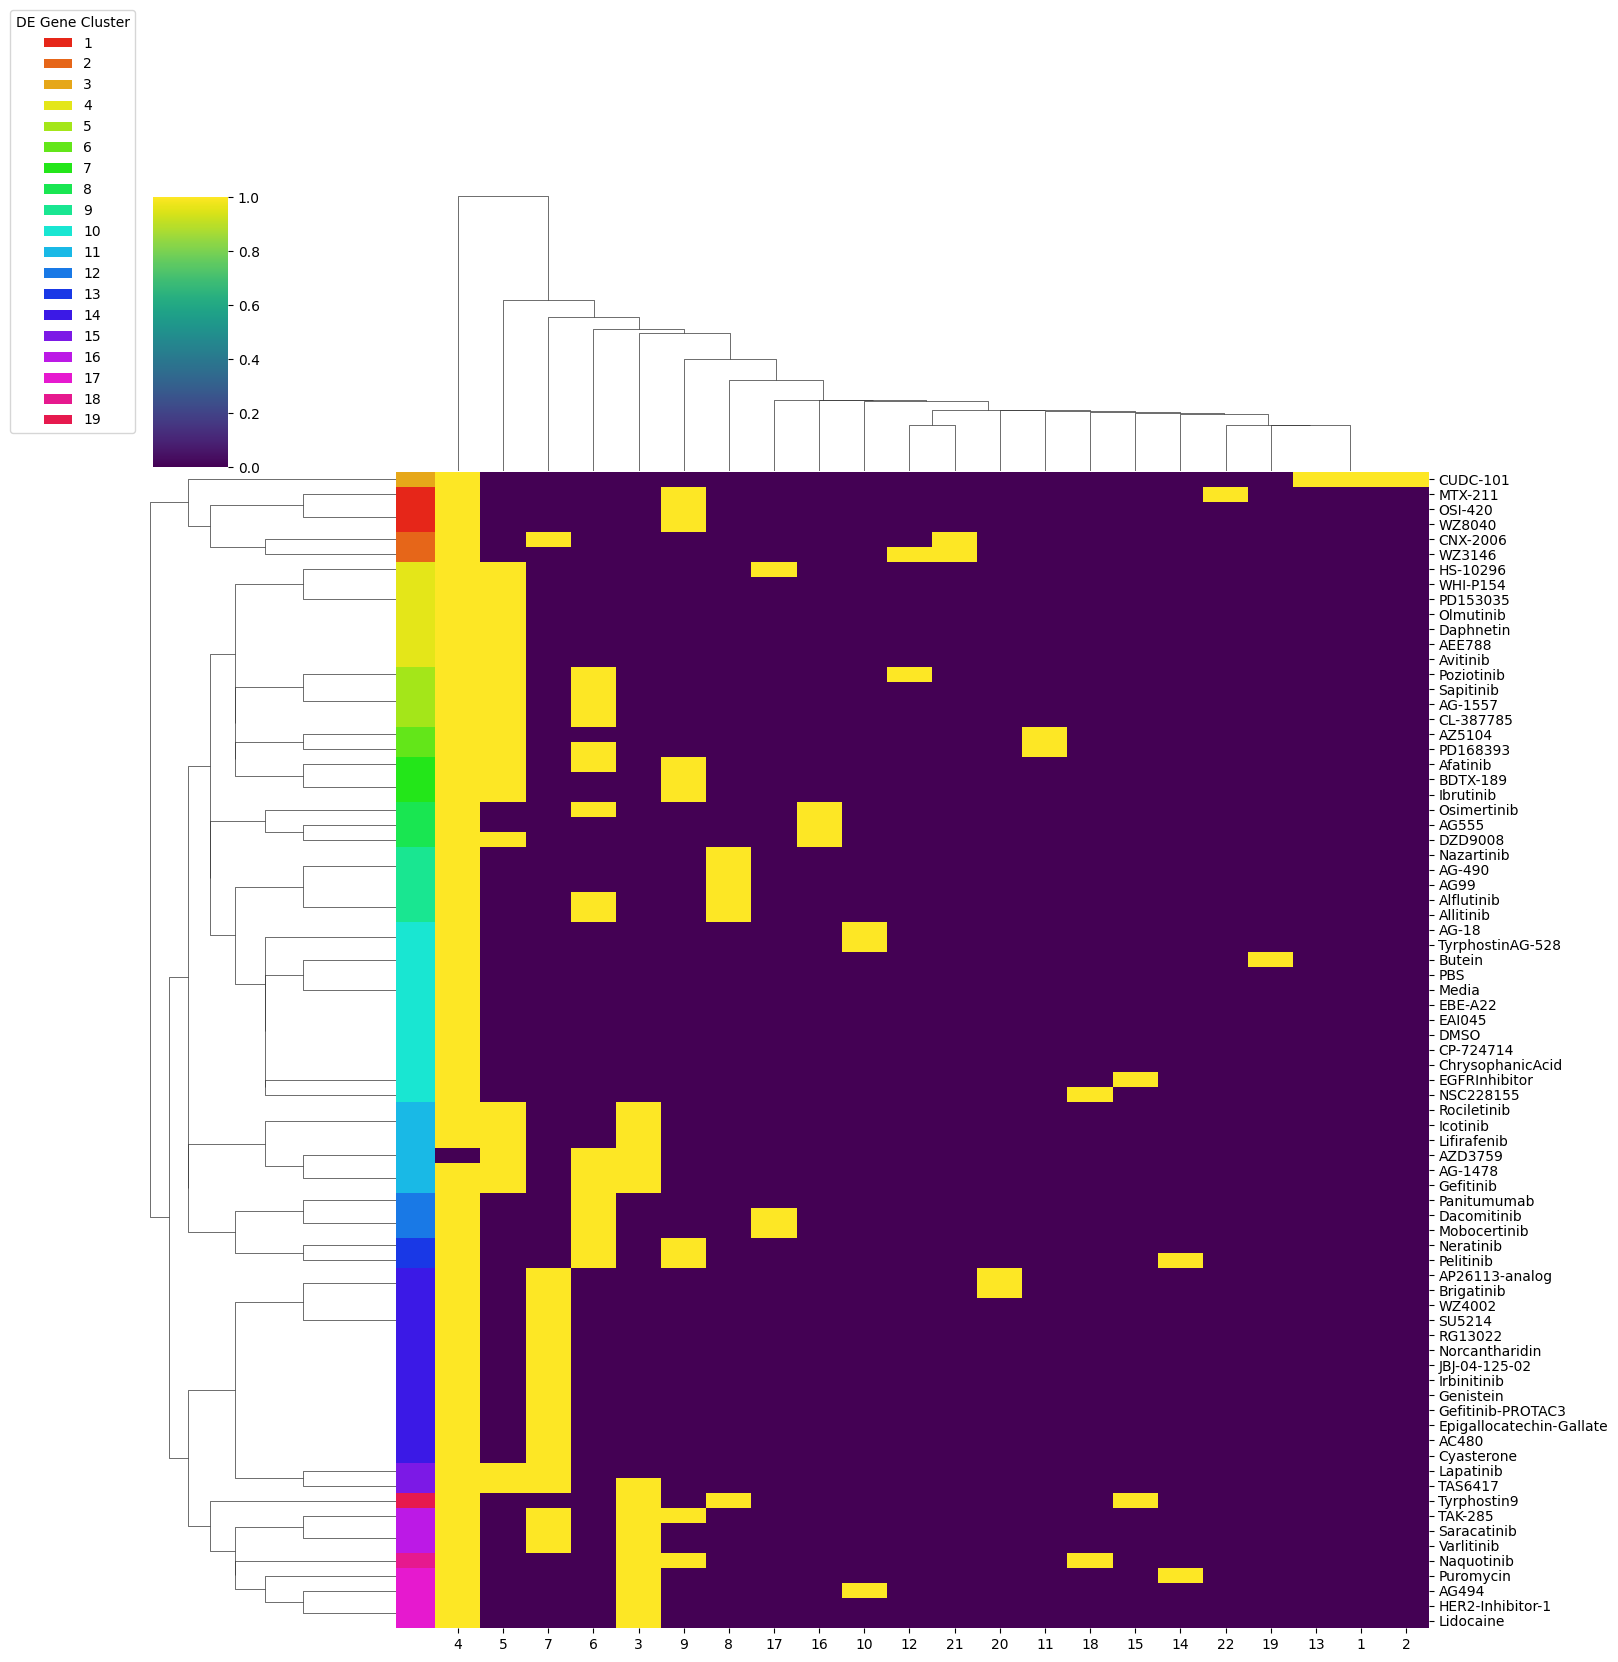

In [ ]:
cluster_method = 'complete'

row_linkage = hierarchy.linkage(
    distance.pdist(drug_class_drugdose_df),
    method=cluster_method
)

row_col_labels = fcluster(row_linkage, t=1.5, criterion='distance')
# row_col_labels = fcluster(row_linkage, t=0.5, criterion='distance')
lut = dict(zip(set(row_col_labels), sns.hls_palette(len(set(row_col_labels)), l=0.5, s=0.8)))
row_col = pd.DataFrame(row_col_labels)[0].map(lut)

g = sns.clustermap(
        drug_class_drugdose_df,
        cmap='viridis',
        xticklabels=True,
        row_linkage=row_linkage,
        row_colors = [row_col],
        yticklabels=True,
        figsize=(15,15)
)

for label in np.unique(row_col_labels):
    g.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
l2 = g.ax_row_dendrogram.legend(title='DE Gene Cluster', loc="lower left",
                               bbox_to_anchor=(-0.08, 0.818), bbox_transform=gcf().transFigure)

plt.show()

# Covariate-specific DE test

In [ ]:
train_adata = adata.copy()

train_adata.obs["donor_cluster"] = [int(x) for x in donor_cluster]
train_adata.obs.loc[train_adata.obs.SHP2mut == 'DMSO', "donor_cluster"] = -1

for cluster_i in range(1, n_clusters + 1):
    train_adata.obs[f"donor_cluster_{cluster_i}"] = (
        train_adata.obs["donor_cluster"] == cluster_i
    ).astype(int)

obs_df = train_adata.obs.copy()
obs_df = obs_df.loc[~obs_df._scvi_sample.duplicated("first")]

model.donor_info = obs_df.set_index("_scvi_sample").sort_index()

sub_train_adata = train_adata[train_adata.obs["donor_cluster"] != "nan"]
sub_train_adata.obs["_indices"] = np.arange(sub_train_adata.shape[0])
sub_train_adata.obs

<ipython-input-49-0099758c92f6>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub_train_adata.obs["_indices"] = np.arange(sub_train_adata.shape[0])


,cell_line,drug_name,replicate,drug_dose,drug_name_dose,_indices,_scvi_sample,_scvi_batch,_scvi_labels,donor_cluster,...,donor_cluster_13,donor_cluster_14,donor_cluster_15,donor_cluster_16,donor_cluster_17,donor_cluster_18,donor_cluster_19,donor_cluster_20,donor_cluster_21,donor_cluster_22
0,BT112,DMSO,DMSO,0.0,DMSO_0.0,0,96,25,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,BT112,Epigallocatechin-Gallate,Epigallocatechin-Gallate,5.0,Epigallocatechin-Gallate_5.0,1,124,32,0,7,...,0,0,0,0,0,0,0,0,0,0
2,BT112,Icotinib,Icotinib,4.0,Icotinib_4.0,2,151,39,0,4,...,0,0,0,0,0,0,0,0,0,0
3,BT112,PBS,PBS,0.0,PBS_0.0,3,213,56,0,4,...,0,0,0,0,0,0,0,0,0,0
4,BT112,HS-10296,HS-10296,2.0,HS-10296_2.0,4,141,37,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181480,BT112,PBS,PBS,0.0,PBS_0.0,76407,213,56,0,4,...,0,0,0,0,0,0,0,0,0,0
181481,BT112,AG99,AG99,2.0,AG99_2.0,76408,30,8,0,4,...,0,0,0,0,0,0,0,0,0,0
181482,BT112,Osimertinib,Osimertinib,2.0,Osimertinib_2.0,76409,209,55,0,4,...,0,0,0,0,0,0,0,0,0,0
181483,BT112,AG555,AG555,5.0,AG555_5.0,76410,29,7,0,16,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Multivariate DE Analysis

cluster_wise_multivar_res = {}
for cluster_i in range(1, n_clusters + 1):
    print('Performing multivariate analysis for cluster %d...'%cluster_i)
    cluster_sub_train_adata = sub_train_adata[
        (sub_train_adata.obs["donor_cluster"] == cluster_i)
        | (sub_train_adata.obs["donor_cluster"] == -1)
    ].copy()

    cluster_multivar_res = model.differential_expression(
        cluster_sub_train_adata,
        sample_cov_keys=[f"donor_cluster_{cluster_i}"],
        batch_size=32,
        store_lfc=True,
    )
    cluster_wise_multivar_res[cluster_i] = cluster_multivar_res

In [ ]:
# SAVE THE MULTIVARIATE DE ANALYSIS RESULTS

import pickle

with open('/content/drive/My Drive/PhD/Research/RG Factor Analysis/MrVI/bt112_clusterwise_multivar_res_normalized_namedosesample_attention_morecells.pkl', 'wb') as outp:
    pickle.dump(cluster_wise_multivar_res, outp, pickle.HIGHEST_PROTOCOL)

cluster_wise_multivar_res

In [ ]:
drug_lfc = pd.DataFrame()
de_dfs = {}
full_dfs = {}
lfc_thresh = 0.2
avg_numDEGs = 0

for cluster_i in cluster_wise_multivar_res:

    betas_ = cluster_wise_multivar_res[cluster_i]['lfc'].transpose("cell_name", "covariate", "gene").loc[{"covariate": f"donor_cluster_{cluster_i}"}].values
    betas_ = (betas_ / np.log(2)).astype('float')

    lfc_df = pd.DataFrame(
            {
                "LFC": betas_.mean(0),
                "LFC_std": betas_.std(0),
                "gene": sub_train_adata.var_names,
                "gene_index": np.arange(sub_train_adata.shape[1]),
            }
        ).assign(absLFC=lambda x: np.abs(x.LFC))
    full_dfs[cluster_i] = lfc_df
    drug_lfc['cluster_%d'%cluster_i] = lfc_df['LFC']
    # DRC_lfc_df['BT112_DRC_%d'%cluster_i] = lfc_df['LFC']

    cond = lfc_df.absLFC > lfc_thresh
    # cond = lfc_df.LFC > lfc_thresh
    betas_de = betas_[:, cond]
    obs_de = lfc_df.loc[cond, :].reset_index(drop=True)
    obs_de.LFC.hist(bins=100)
    de_dfs[cluster_i] = obs_de

    de_genes = obs_de.gene.values
    de_genes = [gene for gene in de_genes if str(gene) != "nan"]
    print('# DEGs for drug response class %d: '%cluster_i + str(len(de_genes)))
    avg_numDEGs += len(de_genes)

print('Avg # DEGs: ' + str(round(avg_numDEGs/cluster_i)))

drug_lfc.index = cluster_wise_multivar_res[1]['gene']
drug_lfc.head()

In [ ]:
topgenes_df = pd.DataFrame()
for cluster_i in cluster_wise_multivar_res:
    a = drug_lfc.iloc[:,cluster_i-1]
    if sum(drug_lfc.iloc[:,cluster_i-1]) == 0.0:
        topgenes_df['z%d'%cluster_i] = ['NaN']*100
    else:
        topgenes_idx = sorted(range(len(a)), key=lambda i: a[i])[-100:]
        topgenes_df['drug_cluster_%d'%cluster_i] = a.index[topgenes_idx].values.tolist()[::-1]

topgenes_df

# Heatmap: Gene x Drug Response

In [ ]:
# Create a unionized set of DE genes
de_genes = set()

for cluster_i in cluster_wise_multivar_res:
    de_genes = de_genes.union(set(de_dfs[cluster_i].gene.values))

# Retrieve LFC values
drug_class_deg_df = pd.DataFrame(0,index=list(de_genes),columns=np.arange(1,n_clusters+1))
for cluster_i in cluster_wise_multivar_res:
    for g in de_genes:
        if g in de_dfs[cluster_i].gene.values:
            drug_class_deg_df.loc[g,cluster_i] = de_dfs[cluster_i][de_dfs[cluster_i].gene == g].LFC.values[0]

drug_class_deg_df

In [ ]:
cluster_method = 'complete'

row_linkage = hierarchy.linkage(
    distance.pdist(drug_class_deg_df),
    method=cluster_method
)

row_col_labels = fcluster(row_linkage, t=3, criterion='distance')
lut = dict(zip(set(row_col_labels), sns.hls_palette(len(set(row_col_labels)), l=0.5, s=0.8)))
row_col = pd.DataFrame(row_col_labels)[0].map(lut)

g = sns.clustermap(
        drug_class_deg_df,
        cmap='icefire',
        xticklabels=True,
        row_linkage=row_linkage,
        row_colors = [row_col],
        figsize=(10,10),
        vmin=-2,
        vmax=2
)

for label in np.unique(row_col_labels):
    g.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)
l2 = g.ax_row_dendrogram.legend(title='DE Gene Cluster', loc="lower left",
                               bbox_to_anchor=(-0.15, 0.72), bbox_transform=gcf().transFigure,
                               ncol=2)

plt.show()

# GSEA

In [ ]:
# perform_gsea function

def perform_gsea(
    genes: list,
    gene_sets: list = None,
    organism: str = "human",
    n_trials_max: int = 20,
    plot: bool = False,
    plot_sortby: str = "Adjusted P-value",
    plot_ntop: int = 5,
    use_server: bool = True,
):
    """
    Perform GSEA using Enrichr.

    Parameters
    ----------
    genes :
        List of gene symbols to perform GSEA on.
    gene_sets :
        List of gene sets to use for GSEA.
        An exhaustive list of gene sets can be found using `gp.get_library_name()`
    organism :
        Considered organism.
    n_trials_max :
        Maximum number of trials to perform GSEA. Consider increasing if GSEA fails.
    plot :
        Whether to plot the results.
    plot_sortby :
        Key to sort the results by, only used if `plot` is True.
    plot_ntop :
        Number of top results to plot, only used if `plot` is True.
    use_server :
        Whether to use the web server.

    Returns
    -------
    A pandas DataFrame containing the GSEA results.
    If `plot` is True, also returns a plotnine figure.
    """
    try:
        import gseapy as gp
    except ImportError:
        raise ImportError(
            "GSEApy is not installed. Please install it via pip or conda."
        )

    provided_gene_sets = gene_sets is not None
    if not provided_gene_sets:
        gene_sets = [
            "MSigDB_Hallmark_2020",
            "WikiPathway_2021_Human",
            "KEGG_2021_Human",
            "Reactome_2022",
            "GO_Biological_Process_2023",
            "GO_Cellular_Component_2023",
            "GO_Molecular_Function_2023",
        ]
        if not use_server:
            gene_set_dicts = [
                gp.parser.download_library(gene_set_name, "human")
                for gene_set_name in gene_sets
            ]
            gene_set_names = gene_sets
            gene_sets = gene_set_dicts

    if use_server:
        is_done = False
        for _ in range(n_trials_max):
            if is_done:
                break

            try:
                enr = gp.enrichr(
                    gene_list=genes,
                    gene_sets=gene_sets,
                    organism=organism,
                    outdir=None,
                    verbose=False,
                )
                is_done = True
            except:
                time.sleep(3)
                continue
        if not is_done:
            raise ValueError(
                "GSEA failed; please consider increasing `n_trials_max` or try running enrichr manually."
            )
    else:
        enr = gp.enrich(
            gene_list=genes,
            gene_sets=gene_sets,
            outdir=None,
            verbose=False,
        )
    enr_results = enr.results.copy().sort_values("Adjusted P-value")
    enr_results.loc[:, "Significance score"] = -np.log10(
        enr_results.loc[:, "Adjusted P-value"]
    )
    if not use_server and not provided_gene_sets:
        gene_set_mapping = {
            f"gs_ind_{i}": gene_set_name
            for i, gene_set_name in enumerate(gene_set_names)
        }
        enr_results.loc[:, "Gene_set"] = enr_results.loc[:, "Gene_set"].map(
            gene_set_mapping
        )
    if not plot:
        return enr_results

    try:
        import plotnine as p9
    except ImportError:
        raise ImportError(
            "Plotnine is not installed. Please install it via pip or conda."
        )
    plot_df = (
        enr_results.loc[lambda x: x["Adjusted P-value"] < 0.1, :]
        .sort_values(plot_sortby)
        .head(plot_ntop)
        .sort_values("Gene_set")
    )
    fig = (
        p9.ggplot(plot_df, p9.aes(x="Term", y="Significance score", fill="Gene_set"))
        + p9.geom_col()
        + p9.scale_x_discrete(limits=plot_df.Term.tolist())
        + p9.labs(
            x="",
        )
        + p9.theme_classic()
        + p9.theme(
            strip_background=p9.element_blank(),
            axis_text_x=p9.element_text(rotation=45, hjust=1),
            axis_text=p9.element_text(family="sans-serif", size=5),
            axis_title=p9.element_text(family="sans-serif", size=6),
        )
    )
    return enr_results, fig

In [ ]:
import gseapy as gp

# GSEA for DE genes
# Load gene sets
plt_vmax = 2

gene_sets = [
    gp.parser.download_library("MSigDB_Hallmark_2020", "human"),
    gp.parser.download_library('MSigDB_Oncogenic_Signatures', "human"),
    gp.parser.download_library('Kinase_Perturbations_from_GEO_up', "human"),
    gp.parser.download_library('Kinase_Perturbations_from_GEO_down', "human")
]

In [ ]:
enr_result_dict_up = {}

for cluster_i in cluster_wise_multivar_res:
    de_genes_up = de_dfs[cluster_i][de_dfs[cluster_i].LFC > 0].gene.values
    de_genes_up = [gene for gene in de_genes_up if str(gene) != "nan"]
    try:
        enr_results, fig = perform_gsea(
            de_genes_up, gene_sets=gene_sets, plot=True, use_server=False
        )
        enr_result_dict_up[cluster_i] = enr_results
    except ValueError as e:
        print(e)
        continue

enr_pval_df_records = []
for cluster_idx in range(1, n_clusters + 1):
    if cluster_idx not in enr_result_dict_up:
        enr_pval_df_records.append({"cluster_idx": cluster_idx})
    else:
        enr_cluster_results = enr_result_dict_up[cluster_idx]
        enr_pval_df_records.append(
            {
                "cluster_idx": cluster_idx,
                **enr_cluster_results.pivot(
                    index="Gene_set", columns="Term", values="Significance score"
                )
                .iloc[0]
                .to_dict(),
            }
        )
enr_pval_df = pd.DataFrame.from_records(enr_pval_df_records, index="cluster_idx")
enr_pval_df.fillna(0, inplace=True)

# Plot GSEA heatmap

filtered_enr_pval_df = enr_pval_df.loc[
    :, (enr_pval_df > -np.log10(0.1)).values.any(axis=0)
]

g = sns.clustermap(
        filtered_enr_pval_df.T,
        col_cluster=False,
        row_cluster=False,
        yticklabels=True,
        xticklabels=True,
        vmin=0,
        vmax=plt_vmax,
        cmap="Reds",
).fig.suptitle('GSEA Clustermap: Up-regulated Significance Score')

plt.show()

In [ ]:
enr_result_dict_down = {}

for cluster_i in cluster_wise_multivar_res:
    de_genes_down = de_dfs[cluster_i][de_dfs[cluster_i].LFC < 0].gene.values
    de_genes_down = [gene for gene in de_genes_down if str(gene) != "nan"]
    try:
        enr_results, fig = perform_gsea(
            de_genes_down, gene_sets=gene_sets, plot=True, use_server=False
        )
        enr_result_dict_down[cluster_i] = enr_results
    except ValueError as e:
        print(e)
        continue

enr_pval_df_records = []
for cluster_idx in range(1, n_clusters + 1):
    if cluster_idx not in enr_result_dict_down:
        enr_pval_df_records.append({"cluster_idx": cluster_idx})
    else:
        enr_cluster_results = enr_result_dict_down[cluster_idx]
        enr_pval_df_records.append(
            {
                "cluster_idx": cluster_idx,
                **enr_cluster_results.pivot(
                    index="Gene_set", columns="Term", values="Significance score"
                )
                .iloc[0]
                .to_dict(),
            }
        )
enr_pval_df = pd.DataFrame.from_records(enr_pval_df_records, index="cluster_idx")
enr_pval_df.fillna(0, inplace=True)

# Plot GSEA heatmap

filtered_enr_pval_df = enr_pval_df.loc[
    :, (enr_pval_df > -np.log10(0.1)).values.any(axis=0)
]

g = sns.clustermap(
        filtered_enr_pval_df.T,
        col_cluster=False,
        row_cluster=False,
        yticklabels=True,
        xticklabels=True,
        vmin=0,
        vmax=plt_vmax,
        cmap="Blues",
).fig.suptitle('GSEA Clustermap: Down-regulated Significance Score')

plt.show()

In [ ]:
# Cluster wise barplots

INCH_TO_CM = 1 / 2.54

top_de_genes_per_cluster = {}
for cluster_i, de_df in de_dfs.items():
    if de_df.shape[0] == 0:
        continue
    de_df.sort_values("absLFC", ascending=False, inplace=True)
    abr_de_df = de_df[:20]
    top_de_genes_per_cluster[cluster_i] = abr_de_df[:50].gene.values
    abr_de_df.sort_values("LFC", ascending=False, inplace=True)
    fig, ax = plt.subplots(figsize=(15 * INCH_TO_CM, 15 * INCH_TO_CM))
    sns.barplot(
        x="gene",
        y="LFC",
        color="blue",
        data=abr_de_df,
        ax=ax,
    )
    ax.axhline(y=0, color="black")

    # rotate x labels
    ax.set_title(f"Cluster {cluster_i} Top LFC DE Genes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)